In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder

In [3]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/amazon_products_sales_data_uncleaned.csv")

In [4]:
df = data.copy()

In [5]:
df.isnull().sum()

title                           0
rating                       1024
number_of_reviews            1024
bought_in_last_month         3217
current/discounted_price    11749
price_on_variant                0
listed_price                    0
is_best_seller                  0
is_sponsored                    0
is_couponed                     0
buy_box_availability        14653
delivery_details            11720
sustainability_badges       39267
image_url                       0
product_url                  2069
collected_at                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     42675 non-null  object
 1   rating                    41651 non-null  object
 2   number_of_reviews         41651 non-null  object
 3   bought_in_last_month      39458 non-null  object
 4   current/discounted_price  30926 non-null  object
 5   price_on_variant          42675 non-null  object
 6   listed_price              42675 non-null  object
 7   is_best_seller            42675 non-null  object
 8   is_sponsored              42675 non-null  object
 9   is_couponed               42675 non-null  object
 10  buy_box_availability      28022 non-null  object
 11  delivery_details          30955 non-null  object
 12  sustainability_badges     3408 non-null   object
 13  image_url                 42675 non-null  object
 14  product_url           

In [7]:
df.head()

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3 out of 5 stars,"2,457",6K+ bought in past month,9.99,basic variant price: nan,$15.99,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6 out of 5 stars,"3,044",2K+ bought in past month,314.00,basic variant price: nan,$349.00,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6 out of 5 stars,"35,882",10K+ bought in past month,NaN,basic variant price: $162.24,No Discount,Best Seller,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8 out of 5 stars,"28,988",10K+ bought in past month,NaN,basic variant price: $72.74,No Discount,No Badge,Organic,No Coupon,NaN,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29


In [8]:
df["current/discounted_price"] = pd.to_numeric(df["current/discounted_price"], errors = "coerce")

In [9]:
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors = "coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     42675 non-null  object 
 1   rating                    41651 non-null  object 
 2   number_of_reviews         26379 non-null  float64
 3   bought_in_last_month      39458 non-null  object 
 4   current/discounted_price  29734 non-null  float64
 5   price_on_variant          42675 non-null  object 
 6   listed_price              42675 non-null  object 
 7   is_best_seller            42675 non-null  object 
 8   is_sponsored              42675 non-null  object 
 9   is_couponed               42675 non-null  object 
 10  buy_box_availability      28022 non-null  object 
 11  delivery_details          30955 non-null  object 
 12  sustainability_badges     3408 non-null   object 
 13  image_url                 42675 non-null  object 
 14  produc

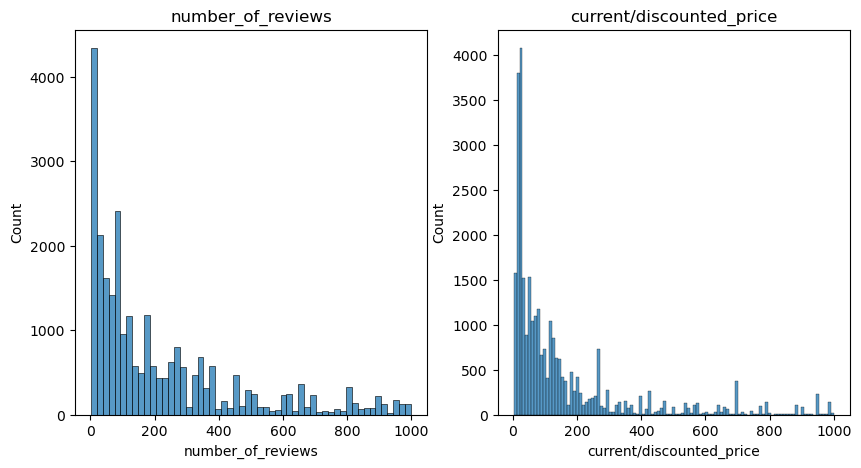

In [11]:
c1 = df.select_dtypes("float")

fig,axs = plt.subplots(1,2, figsize=(10,5))
for i in range(2):
    sns.histplot(data = df,x = df[c1.columns[i]],ax = axs[i])
    axs[i].set_title(c1.columns[i])
plt.show()

### Null Value Handling

In [12]:
c2 = df.select_dtypes("object")
for i in c1:
    df[i]= df[i].fillna(df[i].median())

for j in c2:
    df[j] = df[j].fillna(df[j].mode()[0])
df.isnull().sum()

title                       0
rating                      0
number_of_reviews           0
bought_in_last_month        0
current/discounted_price    0
price_on_variant            0
listed_price                0
is_best_seller              0
is_sponsored                0
is_couponed                 0
buy_box_availability        0
delivery_details            0
sustainability_badges       0
image_url                   0
product_url                 0
collected_at                0
dtype: int64

### Outlier Removal

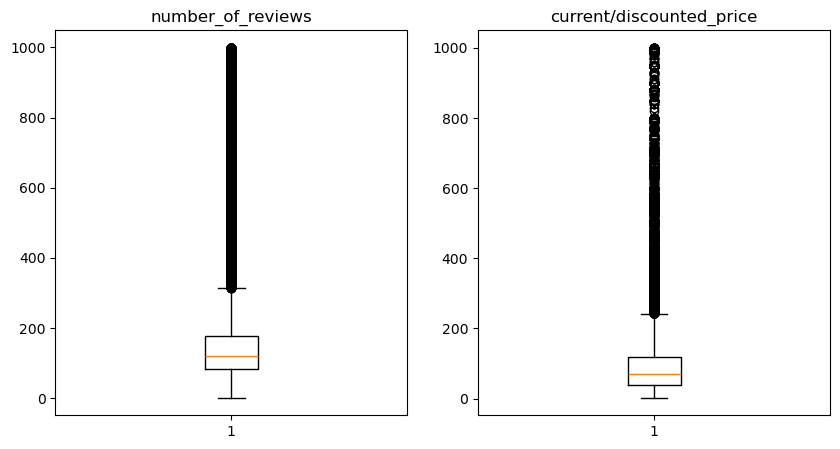

In [13]:
fig,axs = plt.subplots(1,2, figsize = (10,5))
for i in range(2):
    axs[i].boxplot(df[c1.columns[i]])
    axs[i].set_title(c1.columns[i])
plt.show()

In [14]:
def outliers(df,col):
    
    Q1 = np.percentile(df[col],25,method = "midpoint")
    Q3 = np.percentile(df[col],75,method = "midpoint")
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    outlier = df[(df[col]>upper)|(df[col]<lower)]
    outlier_list = outlier[col].tolist()

    return upper,lower,outlier,outlier_list

In [15]:
upper,lower,outlier,list1 = outliers(df,"number_of_reviews")
print(f"upper={upper}, lower={lower},list1 = {list1}")
outlier.head()

upper=314.0, lower=-54.0,list1 = [375.0, 358.0, 450.0, 744.0, 885.0, 815.0, 598.0, 549.0, 496.0, 723.0, 743.0, 423.0, 647.0, 590.0, 510.0, 490.0, 526.0, 812.0, 378.0, 380.0, 866.0, 971.0, 391.0, 391.0, 340.0, 476.0, 768.0, 620.0, 457.0, 530.0, 743.0, 562.0, 591.0, 796.0, 757.0, 451.0, 579.0, 658.0, 360.0, 960.0, 454.0, 805.0, 894.0, 465.0, 598.0, 447.0, 657.0, 927.0, 598.0, 394.0, 581.0, 343.0, 834.0, 519.0, 762.0, 925.0, 412.0, 604.0, 413.0, 813.0, 379.0, 505.0, 646.0, 740.0, 476.0, 491.0, 836.0, 816.0, 759.0, 550.0, 615.0, 387.0, 520.0, 478.0, 787.0, 812.0, 791.0, 625.0, 553.0, 685.0, 925.0, 390.0, 460.0, 393.0, 384.0, 628.0, 570.0, 924.0, 872.0, 561.0, 416.0, 776.0, 576.0, 765.0, 645.0, 959.0, 929.0, 634.0, 770.0, 477.0, 728.0, 405.0, 366.0, 826.0, 856.0, 738.0, 369.0, 408.0, 668.0, 919.0, 768.0, 422.0, 477.0, 691.0, 545.0, 755.0, 664.0, 661.0, 967.0, 609.0, 623.0, 449.0, 796.0, 422.0, 748.0, 576.0, 515.0, 763.0, 650.0, 827.0, 986.0, 548.0, 329.0, 621.0, 513.0, 501.0, 472.0, 871.0, 

,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,image_url,product_url,collected_at
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6 out of 5 stars,375.0,300+ bought in past month,89.68,basic variant price: 2.4GHz,$159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
32,OWC 2.0TB Aura Pro X2 (GEN 4) SSD Complete Upg...,4.4 out of 5 stars,358.0,100+ bought in past month,239.99,basic variant price: nan,No Discount,No Badge,Sponsored,No Coupon,Add to cart,"Delivery Mon, Sep 1",Small Business,https://m.media-amazon.com/images/I/51vvx1JymA...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29
43,HP OfficeJet Pro 8125e Wireless All-in-One Col...,4.1 out of 5 stars,450.0,20K+ bought in past month,119.99,basic variant price: nan,$169.99,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",Small Business,https://m.media-amazon.com/images/I/61ec0I5hH9...,/HP-OfficeJet-Wireless-Printing-405T6A/dp/B0CT...,2025-08-21 11:14:46
68,Roku Streaming Stick Plus 2025 - 4K & HDR Roku...,4.5 out of 5 stars,744.0,10K+ bought in past month,69.95,basic variant price: $44.99,No Discount,No Badge,Organic,No Coupon,Add to cart,"Delivery Mon, Sep 1",Works with Alexa,https://m.media-amazon.com/images/I/71gFPvNe5K...,/Roku-Streaming-Stick-Plus-2025/dp/B0DXY833HV/...,2025-08-21 11:15:00
80,"HP 936 Black, Cyan, Magenta, Yellow Ink Cartri...",4.6 out of 5 stars,885.0,10K+ bought in past month,135.00,basic variant price: nan,No Discount,No Badge,Organic,No Coupon,Add to cart,"Delivery Fri, Aug 29",Small Business,https://m.media-amazon.com/images/I/61Vrz4MFoY...,/HP-Cartridges-OfficeJet-Eligible-6C3Z5LN/dp/B...,2025-08-21 11:15:00


In [16]:
df.drop(outlier.index,inplace = True)

In [17]:
outlier = df[(df["number_of_reviews"] > upper) | (df["number_of_reviews"]<lower)]["number_of_reviews"].tolist()
outlier

[]

In [ ]:
upper,lower,outlier,list2 = outliers(df,"current/discounted_price")
print(list2)
outlier.head()

In [20]:
df.drop(outlier.index, inplace = True)

In [21]:
df.reset_index(drop = True, inplace = True)

In [22]:
df1 = df.copy()

In [23]:
df1.nunique()

title                        6273
rating                         29
number_of_reviews             312
bought_in_last_month           52
current/discounted_price     1666
price_on_variant             2634
listed_price                  665
is_best_seller                  8
is_sponsored                    2
is_couponed                    33
buy_box_availability            1
delivery_details              209
sustainability_badges          16
image_url                    5709
product_url                 29494
collected_at                 1555
dtype: int64

In [24]:
df1.shape

(31461, 16)

In [25]:
df1.drop("product_url",axis = 1, inplace = True)

In [26]:
df1.drop(["title","image_url"],axis = 1 , inplace = True)

In [29]:
le = LabelEncoder()

In [40]:
obj = df1.select_dtypes("object")

for i in obj.columns:
    df1[i] = le.fit_transform(df1[i],dtype = int)

In [41]:
mm = MinMaxScaler()

In [42]:
col = df1.columns

df1[col] = mm.fit_transform(df1[col])

In [43]:
df1

,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,buy_box_availability,delivery_details,sustainability_badges,collected_at
0,0.750000,0.380192,0.549020,0.032225,1.000000,0.222892,0.571429,1.0,0.0000,0.0,0.346154,0.933333,0.0
1,0.857143,0.380192,0.215686,0.289851,0.264337,1.000000,0.142857,0.0,0.0000,0.0,0.365385,0.933333,0.0
2,0.928571,0.380192,0.215686,0.289851,0.836688,1.000000,0.571429,0.0,0.0000,0.0,0.365385,0.933333,0.0
3,0.857143,0.380192,0.196078,0.289851,0.970376,1.000000,0.142857,0.0,0.0000,0.0,0.365385,0.933333,0.0
4,0.821429,0.380192,0.215686,0.289851,0.913027,1.000000,0.571429,0.0,0.0000,0.0,0.365385,0.933333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31456,0.928571,0.380192,0.450980,0.041849,1.000000,1.000000,0.571429,0.0,0.0000,0.0,0.913462,0.933333,1.0
31457,0.714286,0.226837,0.862745,0.289851,1.000000,0.019578,0.714286,0.0,0.0000,0.0,0.927885,0.933333,1.0
31458,1.000000,0.000000,0.176471,0.831400,1.000000,1.000000,0.571429,0.0,0.0000,0.0,0.937500,0.933333,1.0
31459,0.714286,0.060703,0.254902,0.375956,0.445879,1.000000,0.571429,0.0,0.4375,0.0,0.927885,0.933333,1.0


In [44]:
df2 = df.copy()

In [45]:
df2.drop(["title","image_url","product_url"],axis = 1 , inplace = True)

In [46]:
df2.nunique()

rating                        29
number_of_reviews            312
bought_in_last_month          52
current/discounted_price    1666
price_on_variant            2634
listed_price                 665
is_best_seller                 8
is_sponsored                   2
is_couponed                   33
buy_box_availability           1
delivery_details             209
sustainability_badges         16
collected_at                1555
dtype: int64

In [47]:
obj = df2.select_dtypes("object")

In [49]:
df2 = pd.get_dummies(obj , dtype = int)

In [50]:
df2

,rating_1.0 out of 5 stars,rating_1.5 out of 5 stars,rating_2.0 out of 5 stars,rating_2.4 out of 5 stars,rating_2.6 out of 5 stars,rating_2.7 out of 5 stars,rating_2.8 out of 5 stars,rating_2.9 out of 5 stars,rating_3.0 out of 5 stars,rating_3.1 out of 5 stars,...,collected_at_2025-08-30 19:53:37,collected_at_2025-08-30 19:53:49,collected_at_2025-08-30 19:54:02,collected_at_2025-08-30 19:54:15,collected_at_2025-08-30 19:54:27,collected_at_2025-08-30 19:54:39,collected_at_2025-08-30 19:54:52,collected_at_2025-08-30 19:55:04,collected_at_2025-08-30 19:55:28,collected_at_2025-08-30 19:56:33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
